# Appendix

In [1]:
import numpy as np 
import pandas as pd 
import itertools

import sklearn


## Data Cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Model Selection 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


## Hyperparameter selection 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


## Model Evaluation 
from sklearn.metrics import mean_squared_error

## Feature Selection
from sklearn.inspection import permutation_importance

## Interpret 
from sklearn.inspection import PartialDependenceDisplay
import shap

## Additional plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

### Training Data 

In [ ]:
X_data = pd.read_csv("background.csv")
y_data = pd.read_csv("train.csv")

## Merge datasets so that there is one dataset containing both 
## features and target variables  
data_df = X_data.merge(y_data, on="challengeID", how = 'inner')data_df.head()

In [5]:
data_df.head()

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m5d20,m5k10,f5c6,k5f1,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,-3,-3,-9,-9,-3,0,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,NaN,NaN,NaN,NaN,NaN,NaN
1,3,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,NaN,NaN,NaN,NaN,NaN,NaN
2,6,-3,-3,0,30,-3,1,-3,-3,-3,...,26.287101,9.628369,15.981275,3.656543,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-5.812319,4.627115,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,-3,-3,-3,45,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,NaN,NaN,NaN,NaN,NaN,NaN


Imputing the missing values:

In [ ]:
## Columns containing na values 
cols_with_nas = [] 
cols_with_nas.append("d3a33a_14o") ## Column manually found

## Columns with ONLY na values 
cols_only_nas = [] 

for col in data_df.columns: 
    if 0 < sum(data_df[col].isnull()) and sum(data_df[col].isnull()) < 2121:
        cols_with_nas.append(col)
    if sum(data_df[col].isnull()) == 2121:
        cols_only_nas.append(col)

In [ ]:
## Create a copy of the dataframes 
data_df_clean = data_df
## Look at the type of columns with missing values 
data_df_clean[cols_with_nas].dtypes.unique()
## Drop columns with only na values 
data_df_clean = data_df_clean.drop(columns = cols_only_nas)

In [18]:
## Look at the type of columns with missing values 
data_df_clean[cols_with_nas].dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [ ]:
## For columns with float values, impute missing values using the mean  

float_columns = list(data_df_clean[cols_with_nas].dtypes[data_df_clean[cols_with_nas].dtypes == "float64"].index)

for col in float_columns:
    
    col_mean = data_df_clean[col].mean()
    data_df_clean[col].fillna(col_mean, inplace=True) 
    
## For columns with float values, impute missing values using the most frequent values   
string_columns = list(data_df_clean[cols_with_nas].dtypes[data_df_clean[cols_with_nas].dtypes == "O"].index)
string_columns.append("cf4fint")

for col in string_columns:
    impute_most = data_df_clean[col].value_counts().index[0]
    data_df_clean[col] = data_df_clean[col].replace(to_replace = np.nan, value = impute_most)    

One-hot encoding:

In [ ]:
 for col in string_columns: 
    lb = LabelEncoder()
    col_original = data_df_clean[col].map(lambda x:str(x))
    new_col = lb.fit_transform(col_original)
    data_df_clean[col] = new_col

In [41]:
data_df_clean.head()

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m5d20,m5k10,f5c6,k5f1,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,-3,-3,-9,-9,-3,0,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
1,3,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
2,6,-3,-3,0,30,-3,1,-3,-3,-3,...,26.287101,9.628369,15.981275,3.656543,2.866738,3.500000,0.090909,0.00000,0.000000,0.000000
3,7,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-5.812319,4.627115,2.500000,3.250000,0.000000,0.00000,0.000000,0.000000
4,8,-3,-3,-3,45,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,24.038266,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771


Saving the training data:

In [ ]:
# data_df_clean.to_csv("Training_Full.csv")

### Testing Data 

In [ ]:
X_data = pd.read_csv("background.csv")
y_data = pd.read_csv("test.csv")

## Merge datasets so that there is one dataset containing both 
## features and target variables  
data_df = X_data.merge(y_data, on="challengeID", how = 'inner')

In [3]:
data_df.head()

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m5d20,m5k10,f5c6,k5f1,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,2,-3,-3,0,40,-3,1,-3,-3,-3,...,26.671897,9.628369,15.981275,3.667679,NaN,3.50,0.000000,False,False,False
1,4,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-6.303171,4.140511,3.00,3.25,0.000000,True,False,False
2,11,-3,-3,0,30,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,3.893828,3.25,4.00,0.181818,False,True,True
3,15,-3,-3,0,37,-3,1,-3,-3,-3,...,26.484219,9.628369,15.981275,3.656543,2.75,4.00,0.000000,False,False,True
4,17,-3,-3,-3,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-5.812319,3.900317,3.25,3.50,0.363636,False,True,False


Imputing the missing values:

In [8]:
## Columns containing na values 
cols_with_nas = [] 
## Column manually found
cols_with_nas.append("d3a33a_14o")

## Columns with ONLY na values 
cols_only_nas = [] 
cols_only_nas.append("r3a10_a6ot")
cols_only_nas.append("r3b36_a")

for col in data_df.columns: 
    if 0 < sum(data_df[col].isnull()) and sum(data_df[col].isnull()) < 2121:
        cols_with_nas.append(col)
    if sum(data_df[col].isnull()) == 2121:
        cols_only_nas.append(col)

In [9]:
## Create a copy of the dataframes 
data_df_clean = data_df

## Drop columns with only na values 
data_df_clean = data_df_clean.drop(columns = cols_only_nas)

In [10]:
## Variables found manually that contain only missing values 
remove = ["r3a10_a6ot", "r3b36_a"]

data_df[["r3a10_a6ot", "r3b36_a"]].value_counts()

Series([], dtype: int64)

In [11]:
cols_with_nas = [col for col in cols_with_nas if col not in remove]

## Look at the type of columns with missing values 
data_df_clean[cols_with_nas].dtypes.unique()

## Look at the type of columns with missing values 
data_df_clean[cols_with_nas].dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [ ]:
## For columns with float values, impute missing values using the mean  

float_columns = list(data_df_clean[cols_with_nas].dtypes[data_df_clean[cols_with_nas].dtypes == "float64"].index)

for col in float_columns:
    
    col_mean = data_df_clean[col].mean()
    data_df_clean[col].fillna(col_mean, inplace=True) 
    
    
## For columns with float values, impute missing values using the most frequent values   
string_columns = list(data_df_clean[cols_with_nas].dtypes[data_df_clean[cols_with_nas].dtypes == "O"].index)
string_columns.append("cf4fint")


for col in string_columns:
    impute_most = data_df_clean[col].value_counts().index[0]
    data_df_clean[col] = data_df_clean[col].replace(to_replace = np.nan, value = impute_most)    


One-hot encoding:

In [ ]:
for col in string_columns: 
    lb = LabelEncoder()
    col_original = data_df_clean[col].map(lambda x:str(x))
    new_col = lb.fit_transform(col_original)
    data_df_clean[col] = new_coldata_df_clean.head()

In [63]:
data_df_clean.head()

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m5d20,m5k10,f5c6,k5f1,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,2,-3,-3,0,40,-3,1,-3,-3,-3,...,26.671897,9.628369,15.981275,3.667679,2.919582,3.50,0.000000,False,False,False
1,4,-3,-3,0,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-6.303171,4.140511,3.000000,3.25,0.000000,True,False,False
2,11,-3,-3,0,30,-3,1,-3,-3,-3,...,4.476881,9.628369,15.981275,3.893828,3.250000,4.00,0.181818,False,True,True
3,15,-3,-3,0,37,-3,1,-3,-3,-3,...,26.484219,9.628369,15.981275,3.656543,2.750000,4.00,0.000000,False,False,True
4,17,-3,-3,-3,45,-3,1,-3,-3,-3,...,4.476881,9.628369,-5.812319,3.900317,3.250000,3.50,0.363636,False,True,False


Saving the Testing Data: 

In [ ]:
# data_df_clean.to_csv("Test_Full.csv")

### Grit Descriptive Statistics (Figure 1)

In [16]:
## Upload the original training data grit 
grit_original_df = pd.read_csv("train.csv")
grit_original = grit_original_df["grit"] 

grit_list = list(grit_original)
grit_type = ["Grit"] * len(grit_original)

Text(0.5, 1.0, 'Distribution of Grit')

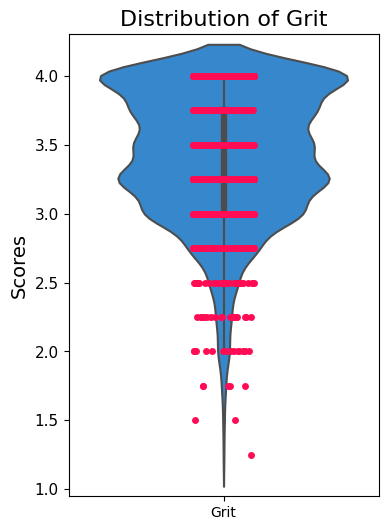

In [19]:
## Plot grit
fig, axes = plt.subplots(figsize=(4, 6))


grit_plot = pd.DataFrame({"Grit": grit_type,
                         "Scores": grit_list})

ax = sns.violinplot(data=grit_plot, palette = {"Grit": "#1d89e4"}, x="Grit", y="Scores")

ax = sns.stripplot(x ='Grit', y ='Scores', data = grit_plot,color= "#ff0c54")

ax.set_ylim(0.95, 4.3)
ax.set_ylabel("Scores", fontsize = 14)
ax.set_xlabel("", fontsize = 14)
ax.tick_params(axis='y', labelsize = 11)
ax.set_title("Distribution of Grit", fontsize = 16)

#fig.savefig('Fig1.png',  bbox_inches='tight')

# Baseline Model

In order to run the baseline model, I saved the following code block as .py files and ran it on a department server. I saved the results in .csv files which is displayed below.

In [ ]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])

train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 1:13023]
y_train_df_gpa = train_df.iloc[:, 13023:13024]
y_train_df_grit = train_df.iloc[:, 13024:13025]
y_train_df_matHard = train_df.iloc[:, 13025:13026]

## Categorical 
y_train_df_evic = train_df.iloc[:, 13026:13027]
y_train_df_layoff = train_df.iloc[:, 13027:13028]
y_train_df_job = train_df.iloc[:, 13028:13029]


X_val_df = val_df.iloc[:, 1:13023]
y_val_df_gpa = val_df.iloc[:, 13023:13024]
y_val_df_grit = val_df.iloc[:, 13024:13025]
y_val_df_matHard = val_df.iloc[:, 13025:13026]

## Categorical 
y_val_df_evic = val_df.iloc[:, 13026:13027]
y_val_df_layoff = val_df.iloc[:, 13027:13028]
y_val_df_job = val_df.iloc[:, 13028:13029]



def one_hot(df): 
    lb = LabelEncoder()
    col_name = df.columns[0]
    col_original = df[col_name].map(lambda x:str(x))
    new_col = lb.fit_transform(col_original)
    df[col_name] = new_col
    return(df)

y_train_df_evic = one_hot(y_train_df_evic)
y_train_df_layoff = one_hot(y_train_df_layoff)
y_train_df_job = one_hot(y_train_df_job)

y_val_df_evic = one_hot(y_val_df_evic)
y_val_df_layoff = one_hot(y_val_df_layoff)
y_val_df_job = one_hot(y_val_df_job)


X_train = np.array(X_train_df)
y_train_gpa = np.array(y_train_df_gpa)
y_train_grit = np.array(y_train_df_grit)
y_train_matHard = np.array(y_train_df_matHard)
y_train_evic = np.array(y_train_df_evic)
y_train_layoff = np.array(y_train_df_layoff)
y_train_job = np.array(y_train_df_job)
    


X_val = np.array(X_val_df)
y_val_gpa = np.array(y_val_df_gpa)
y_val_grit = np.array(y_val_df_grit)
y_val_matHard = np.array(y_val_df_matHard)
y_val_evic = np.array(y_val_df_evic)
y_val_layoff = np.array(y_val_df_layoff)
y_val_job = np.array(y_val_df_job)



df_baselise_metrics = pd.DataFrame({"Outcome": ["gpa", "grit", "mat_hard",
                                               "evic", "layoff", "job"], 
                                   "Metric": ["mse", "mse", "mse",
                                             "mse", "mse", "mse"], 
                                   "Metric_mean": [np.nan]*6,
                                   "Metric_sd": [np.nan]*6})


lin_regres_gpa = LinearRegression()
lin_regres_gpa.fit(X = X_train, y = y_train_gpa)

val_gpa = cross_validate(estimator = lin_regres_gpa, 
               X = X_val, y = y_val_gpa, 
               cv = 5,
               scoring=('neg_mean_squared_error'), 
                        verbose = 2)
df_baselise_metrics.loc[0,"Metric_mean"] = np.mean(val_gpa["test_score"] * -1)
df_baselise_metrics.loc[0,"Metric_sd"] = np.std(val_gpa["test_score"] * -1)



lin_regres_grit = LinearRegression()
lin_regres_grit.fit(X = X_train, y = y_train_grit)

val_grit = cross_validate(estimator = lin_regres_grit, 
               X = X_val, y = y_val_grit, 
               cv = 5,
               scoring=('neg_mean_squared_error'), 
                         verbose = 2)

df_baselise_metrics.loc[1,"Metric_mean"] = np.mean(val_grit["test_score"] * -1)
df_baselise_metrics.loc[1,"Metric_sd"] = np.std(val_grit["test_score"] * -1)




lin_regres_mat = LinearRegression()
lin_regres_mat.fit(X = X_train, y = y_train_matHard.ravel())

val_mat = cross_validate(estimator = lin_regres_mat, 
               X = X_val, y = y_val_matHard.ravel(), 
               cv = 5,
               scoring=("neg_mean_squared_error"), 
                        verbose = 2)

df_baselise_metrics.loc[2,"Metric_mean"] = np.mean(val_mat["test_score"] * -1)
df_baselise_metrics.loc[2,"Metric_sd"] = np.std(val_mat["test_score"] * -1)



log_regres_evic = LogisticRegression(solver = "saga", max_iter=50000)
log_regres_evic.fit(X = X_train, y = y_train_evic.ravel())


val_evic = cross_validate(estimator = log_regres_evic, 
                          X = X_val, y = y_val_evic.ravel(), 
                          cv = 5,
                          scoring=("f1_macro"), 
                         verbose = 2)

df_baselise_metrics.loc[3,"Metric_mean"] = np.mean(val_evic["test_score"] * -1)
df_baselise_metrics.loc[3,"Metric_sd"] = np.std(val_evic["test_score"] * -1)


log_regres_lay = LogisticRegression(solver = "saga", max_iter=50000)
log_regres_lay.fit(X = X_train, y = y_train_layoff.ravel())


val_lay = cross_validate(estimator = log_regres_lay, 
                          X = X_val, y = y_val_layoff.ravel(), 
                          cv = 5,
                          scoring=("f1_macro"), 
                         verbose = 2)

df_baselise_metrics.loc[4,"Metric_mean"] = np.mean(val_lay["test_score"] * -1)
df_baselise_metrics.loc[4,"Metric_sd"] = np.std(val_lay["test_score"] * -1)



log_regres_job = LogisticRegression(solver = "saga", max_iter=50000)
log_regres_job.fit(X = X_train, y = y_train_job.ravel())


val_job = cross_validate(estimator = log_regres_job, 
                          X = X_val, y = y_val_job.ravel(), 
                          cv = 5,
                          scoring=("f1_macro"), 
                         verbose = 2)

df_baselise_metrics.loc[5,"Metric_mean"] = np.mean(val_job["test_score"] * -1)
df_baselise_metrics.loc[5,"Metric_sd"] = np.std(val_job["test_score"] * -1)


## df_baselise_metrics.to_csv("BaselineMetricsFinal.csv")

### (Table 1)

In [7]:
df_baselise_metrics = pd.read_csv("BaselineMetricsFinal.csv").drop(columns=['Unnamed: 0'])
round(df_baselise_metrics,2)

,Outcome,Metric,Metric_mean,Metric_sd
0,gpa,mse,1.51,0.24
1,grit,mse,1.18,0.23
2,mat_hard,mse,0.08,0.01
3,evic,mse,-0.55,0.03
4,layoff,mse,-0.49,0.03
5,job,mse,-0.54,0.01


# Hyperparameter Selection

In order to tune the hyperparameters, I saved the following code blocks as .py files and ran them on a department server. I saved the results in .csv files which I used for the model evaluation. 

### Net Elastic Model

In [ ]:
## Upload the data
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])


## Split into a training set and a validation set 
train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

## Drop "challengeID" from the features and include only "grit" for the target 
X_train_df = train_df.iloc[:, 1:13023]
y_train_df = train_df.iloc[:, 13024:13025]

X_val_df = val_df.iloc[:, 1:13023]
y_val_df = val_df.iloc[:, 13024:13025]

## Convert data into numpy array for the models 
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


## Define the net elastic model 
net_regres = ElasticNet(max_iter = 100000)

## Define the hyperparameter options 
net_hyper = {"alpha" : [0.1, 0.2, 0.3, 0.4, 0.5, ## Penalty ratio parameter 
                   0.6, 0.7, 0.8, 0.9, 1.0,
                   1.1, 1.2, 1.3, 1.4, 1.5,
                     1.6, 1.7, 1.8, 1.9, 2.0]}

## Define the grid search  
net_tune_results = GridSearchCV(estimator = net_regres, 
            param_grid = net_hyper, 
            scoring = 'neg_mean_squared_error', 
            cv = 10)

## Perform the grid search 
net_tune_results.fit(X_val, y_val)


## Put the results in a dataframe 
net_hyper_results = pd.DataFrame(net_tune_results.cv_results_)

## Save the data frame 
# net_hyper_results.to_csv("ModelA_HyperResults.csv")

### Random Forest

In [ ]:
## Upload the data
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])


## Split into a training set and a validation set 
train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

## Drop "challengeID" from the features and include only "grit" for the target 
X_train_df = train_df.iloc[:, 1:13023]
y_train_df = train_df.iloc[:, 13024:13025]

X_val_df = val_df.iloc[:, 1:13023]
y_val_df = val_df.iloc[:, 13024:13025]

## Convert data into numpy array for the models 
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


## Define the random forest model 
ran_forest = RandomForestRegressor()

## Define the hyperparameter options 
RF_hyper = {"n_estimators" : [250, 500, 750, 1000, 1500, 2000], ## Number of trees
           "max_features" : ["sqrt", "log2"], ## Maximum number of features selected 
            "min_samples_leaf": [1, 5, 10, 15, 20] ## Minimum samples per leaf
           }

## Define the grid search  
RF_tune_results = GridSearchCV(estimator = ran_forest, 
            param_grid = RF_hyper, 
            scoring = 'neg_mean_squared_error', 
            cv = 10, verbose = 2)

## Perform the grid search
RF_tune_results.fit(X_val, y_val.ravel())


## Put the results in a dataframe 
RF_tune_results_df = pd.DataFrame(RF_tune_results.cv_results_) 

# Save the data frame 
# RF_tune_results_df.to_csv("ModelB_HyperResults.csv")

### Gradient Boosted Decision Trees

In [ ]:
## Upload the data
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])


## Split into a training set and a validation set 
train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

## Drop "challengeID" from the features and include only "grit" for the target 
X_train_df = train_df.iloc[:, 1:13023]
y_train_df = train_df.iloc[:, 13024:13025]

X_val_df = val_df.iloc[:, 1:13023]
y_val_df = val_df.iloc[:, 13024:13025]

## Convert data into numpy array for the models 
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)
            

## Define the gradient boosted model
GX_model = GradientBoostingRegressor()

## Define the hyperparameter options 
GX_hyper = {"n_estimators" : [500, 750, 1000], ## Number of trees 
            ## Fewer options as informed by random forest results. 
           "max_features" : ["sqrt"], ## Maximum number of features selected 
            "min_samples_leaf": [5, 10, 15], ## Minimum samples per leaf
           "learning_rate" : [0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.99]} 

## Define the grid search  
GX_tune_results = GridSearchCV(estimator = GX_model, 
            param_grid = GX_hyper, 
            scoring = 'neg_mean_squared_error', 
            cv = 10, verbose = 2)

## Perform the grid search
GX_tune_results.fit(X_val, y_val.ravel())


## Put the results in a dataframe 
GX_tune_results_df = pd.DataFrame(GX_tune_results.cv_results_)

# Save the data frame 
#GX_tune_results_df.to_csv("ModelC_HyperResults.csv")

# Model Evaluation

In [2]:
## Uploading the Data
modelA = pd.read_csv("ModelA_HyperResults.csv")
modelB = pd.read_csv("ModelB_HyperResults.csv")
modelC = pd.read_csv("ModelC_HyperResults.csv")

In [4]:
## Example output

modelA.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0,239.755683,254.882069,0.049090,0.092020,0.1,{'alpha': 0.1},-0.981124,-0.678459,-0.809099,-0.589901,-0.969623,-0.729672,-0.771241,-0.542948,-0.608307,-0.527335,-0.720771,0.155159,20
1,1,36.019988,6.222460,0.006813,0.003348,0.2,{'alpha': 0.2},-0.747559,-0.489292,-0.627368,-0.494492,-0.731780,-0.617509,-0.521002,-0.432716,-0.409899,-0.573744,-0.564536,0.110480,19
2,2,26.705132,7.696253,0.027526,0.065298,0.3,{'alpha': 0.3},-0.613730,-0.395079,-0.542671,-0.440348,-0.597697,-0.532889,-0.418287,-0.373976,-0.408436,-0.547291,-0.487040,0.084527,18
3,3,18.507723,2.705232,0.003314,0.002138,0.4,{'alpha': 0.4},-0.544810,-0.339940,-0.483567,-0.407239,-0.532200,-0.462778,-0.390209,-0.335325,-0.380278,-0.528763,-0.440511,0.076070,17
4,4,11.766526,2.518943,0.008272,0.006314,0.5,{'alpha': 0.5},-0.516338,-0.315823,-0.428474,-0.388845,-0.486372,-0.407929,-0.374533,-0.313269,-0.360322,-0.518909,-0.411082,0.071927,16


In [3]:
test_names = ['split0_test_score','split1_test_score',
                          'split2_test_score','split3_test_score',
                          'split4_test_score',  'split5_test_score',
                        'split6_test_score',  'split7_test_score',
                        'split8_test_score',  'split9_test_score']

### (Table 2) 

### Net Elastic Model - Best Hyperparameters

In [6]:
## Find the lowest mean MSE score across all the cross-validations 
## (This corresponds to the highest mean negative MSE score) 
min_mse = modelA["mean_test_score"].max()

## Find the corresponding parameters
best_params = modelA[modelA["mean_test_score"] == min_mse]["params"]

print("The best hyperparameters are:")
print(best_params.values)
print()

print("Mean MSE over the cross-fold validation is: " + str(min_mse * -1))
print("MSE standard deviation over the cross-fold validation is: " + str((modelA["mean_test_score"].std())))

The best hyperparameters are:
["{'alpha': 2.0}"]

Mean MSE over the cross-fold validation is: 0.2913173033005403
MSE standard deviation over the cross-fold validation is: 0.1076393098770068


### Random Forest  - Best Hyperparameters

In [7]:
## Find the lowest mean MSE score across all the cross-validations 
## (This corresponds to the highest mean negative MSE score) 
min_mse = modelB["mean_test_score"].max()

## Find the corresponding parameters
best_params = modelB[modelB["mean_test_score"] == min_mse]["params"]

print("The best hyperparameters are:")
print(best_params.values)
print()

print("Mean MSE over the cross-fold validation is: " + str(min_mse * -1))
print("MSE standard deviation over the cross-fold validation is: " + str((modelB["mean_test_score"].std())))

The best hyperparameters are:
["{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 750}"]

Mean MSE over the cross-fold validation is: 0.1558508665566688
MSE standard deviation over the cross-fold validation is: 0.0009845566954958336


### Gradient Boosted Tree  - Best Hyperparameters

In [8]:
## Find the lowest mean MSE score across all the cross-validations 
## (This corresponds to the highest mean negative MSE score) 
min_mse = modelC["mean_test_score"].max()

## Find the corresponding parameters
best_params = modelC[modelC["mean_test_score"] == min_mse]["params"]

print("The best hyperparameters are:")
print(best_params.values)
print()

print("Mean MSE over the cross-fold validation is: " + str(min_mse * -1))
print("MSE standard deviation over the cross-fold validation is: " + str((modelC["mean_test_score"].std())))

The best hyperparameters are:
["{'learning_rate': 0.01, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 750}"]

Mean MSE over the cross-fold validation is: 0.1550360780992911
MSE standard deviation over the cross-fold validation is: 0.05005258128670893


# Model Selection

<Axes: xlabel='Models', ylabel='MSE'>

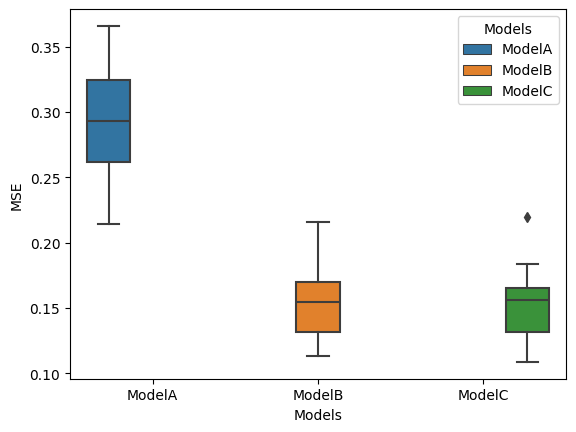

In [5]:
## Looking how the models performed on the different cross folds 

ModelA_mse = (modelA[modelA["mean_test_score"] == modelA["mean_test_score"].max()].iloc[:,7:17] * -1)

ModelB_mse = (modelB[modelB["mean_test_score"] == modelB["mean_test_score"].max()].iloc[:,9:19] * -1)

ModelC_mse = (modelC[modelC["mean_test_score"] == modelC["mean_test_score"].max()].iloc[:,10:20] * -1)


compare_df = pd.DataFrame({"Models": ["ModelA"] * 10 + ["ModelB"] * 10 + ["ModelC"] * 10, 
                          "MSE": list(ModelA_mse.iloc[0,:]) + list(ModelB_mse.iloc[0,:]) + list(ModelC_mse.iloc[0,:])})

sns.boxplot(data=compare_df, x="Models", y="MSE", hue="Models")


I chose ModelC (the gradient boosted decision tree).

###  Gradient Boosted Tree Hyperparameters Details 

I looked into the gradient boosted tree's hyperparameters in more details before I trained them again in the second grid search with four features.

In [64]:
def plot_hyper(hyper_param): 
    modelC_plot = modelC[['split0_test_score','split1_test_score',
                          'split2_test_score','split3_test_score',
                          'split4_test_score',  'split5_test_score',
                        'split6_test_score',  'split7_test_score',
                        'split8_test_score',  'split9_test_score',
                       hyper_param]]
    
    
    for col in test_names: 
        modelC_plot.loc[:,col] = modelC_plot.loc[:,col] * -1
        
    modelC_plot.set_index(hyper_param, inplace=True)
    modelC_plot = modelC_plot.stack().reset_index().rename(columns={"level_1": "split", 0: "MSE"})
        
    return(modelC_plot)
    

learning_rate = plot_hyper("param_learning_rate")
min_samples = plot_hyper("param_min_samples_leaf")
n_estimators = plot_hyper("param_n_estimators")

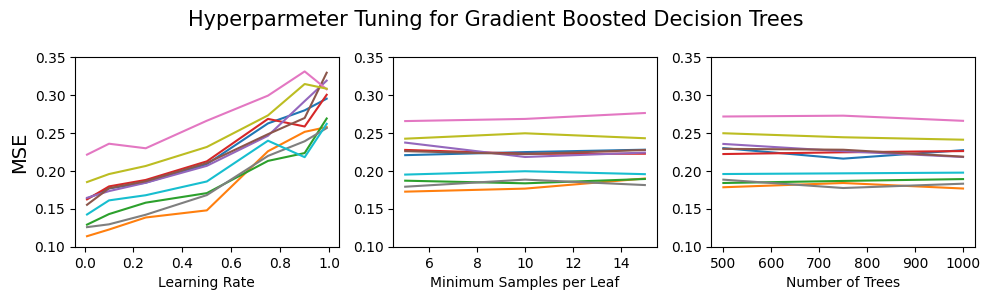

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle('Hyperparmeter Tuning for Gradient Boosted Decision Trees', fontsize = 15)



ax1 = sns.lineplot(ax = axes[0], legend = False, ci = None,
    data=learning_rate, x="param_learning_rate", y="MSE", hue="split")
ax1.set_ylabel("MSE", fontsize = 14)
ax1.set_xlabel("Learning Rate")
ax1.set_ylim([0.1, 0.35])



ax2 = sns.lineplot(ax = axes[1], legend = False, ci = None,
    data=min_samples, x="param_min_samples_leaf", y="MSE", hue="split")
ax2.set_ylabel("", fontsize = 14)
ax2.set_xlabel("Minimum Samples per Leaf")
ax2.set_ylim([0.1, 0.35])

ax3 = sns.lineplot(ax = axes[2], legend = False, ci = None,
    data=n_estimators, x="param_n_estimators", y="MSE", hue="split")
ax3.set_ylabel("", fontsize = 14)
ax3.set_xlabel("Number of Trees")
ax3.set_ylim([0.1, 0.35])

plt.tight_layout(pad = 1, w_pad = 0.5, h_pad = 0.8)


# Feature Importance 

I saved the following code blocks as .py files and ran them on a department server. I saved the results in .csv files.

Default Method

In [ ]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])


train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 1:13023]
y_train_df = train_df.iloc[:, 13024:13025]

X_val_df = val_df.iloc[:, 1:13023]
y_val_df = val_df.iloc[:, 13024:13025]


X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


feature_names = list(X_train_df.columns)

GX_model = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model.fit(X_val, y_val.ravel())

## Finding the importance of each feature
importancesGX = GX_model.feature_importances_

importancesGX_df = pd.DataFrame({"Features": feature_names,
                              "Importance": importancesGX})

#importancesGX_df.to_csv("ModelC_FeatureImp_OrigMeth.csv")


Permutation Method 

In [ ]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])


train_df, val_df = train_test_split(data_df_clean, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 1:13023]
y_train_df = train_df.iloc[:, 13024:13025]

X_val_df = val_df.iloc[:, 1:13023]
y_val_df = val_df.iloc[:, 13024:13025]



X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


feature_names = list(X_train_df.columns)


GX_model = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model.fit(X_val, y_val.ravel())

## Finding the permutation importance of each feature
GX_result = permutation_importance(
    estimator = GX_model, 
    X = X_val, y = y_val, 
    scoring = "neg_mean_squared_error",
    n_repeats = 10, random_state = 15, n_jobs = 2)


GX_importances = pd.Series(GX_result.importances_mean, 
                               index = feature_names)

GX_importances_df = pd.DataFrame({"Importance": GX_importances})

#GX_importances_df.to_csv("ModelC_FeatureImp.csv")

### Plotting Feature Importance for Gradient Boosted Decision Trees

In [6]:
modelC_feat = pd.read_csv("ModelC_FeatureImp_OrigMeth.csv").drop(columns=["Unnamed: 0"])
modelC_feat_perm = pd.read_csv("ModelC_FeatureImp_Perm.csv")

modelC_feat_perm = modelC_feat_perm.rename(columns={"Unnamed: 0": "Features"})

In [7]:
## Example output 
modelC_feat.head()

,Features,Importance
0,cf1intmon,0.0
1,cf1intyr,0.0
2,cf1lenhr,0.0
3,cf1lenmin,0.0
4,cf1twoc,0.0


Default Variable Selection 

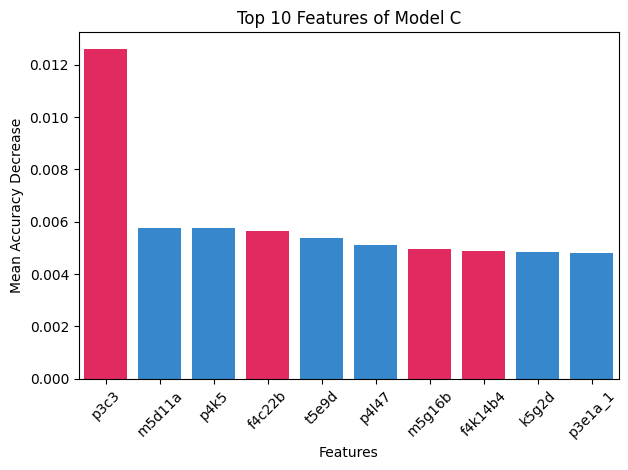

In [11]:
GX_ten_orig = modelC_feat.sort_values(by=['Importance'],
                             ascending=False).iloc[0:10,:]

fig, ax = plt.subplots()

GX_plot_orig_col = {"p3c3": "#ff0c54", ## overlaps 
                    "m5d11a": "#1d89e4",
                    "p4k5": "#1d89e4",
                   "f4c22b": "#ff0c54", ## overlaps 
                    "t5e9d" :"#1d89e4",
                    "p4l47": "#1d89e4",
                    "m5g16b": "#ff0c54", ## overlaps
                    "f4k14b4":  "#ff0c54", ## overlaps
                    "k5g2d": "#1d89e4",
                    "p3e1a_1": "#1d89e4"} 
                

GX_plot_orig = sns.barplot(GX_ten_orig, x="Features", y="Importance", 
                          palette = GX_plot_orig_col)


GX_plot_orig.set_xticklabels(GX_plot_orig.get_xticklabels(), rotation=45)

ax.set_title("Top 10 Features of Model C")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.show()

Permutation Variable Selection 

In [8]:
GX_ten = modelC_feat_perm.sort_values(by=['Importance'],
                             ascending=False).iloc[0:10,:]

In [9]:
## Output example
GX_ten.head()

,Features,Importance
6207,p3c3,0.001125
2627,m2l2a,0.000950
6328,p3j23a,0.000910
10194,m5g16b,0.000864
7544,f4k14b4,0.000793


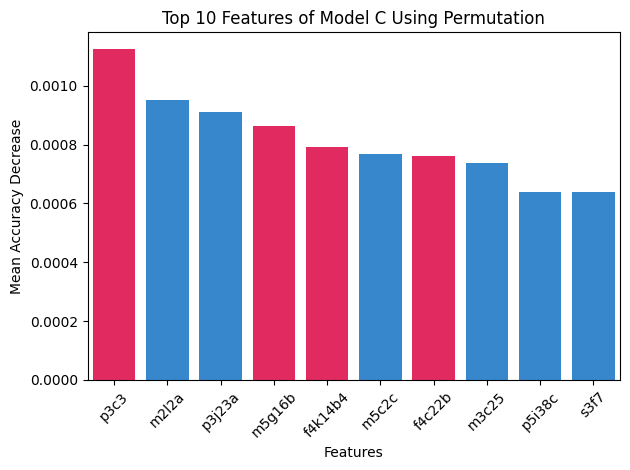

In [13]:
fig, ax = plt.subplots()

GX_plot_col = {"p3c3": "#ff0c54", ## overlaps 
                   "f4c22b": "#ff0c54", ## overlaps 
                    "m5g16b": "#ff0c54", ## overlaps
                    "f4k14b4":  "#ff0c54", ## overlaps
                   "m2l2a":"#1d89e4",
               "p3j23a": "#1d89e4",
               "m5c2c": "#1d89e4",
               "m3c25": "#1d89e4",
               "p5i38c": "#1d89e4",
               "s3f7": "#1d89e4"
              } 



GX_plot = sns.barplot(GX_ten, x="Features", y="Importance", palette = GX_plot_col)


GX_plot.set_xticklabels(GX_plot.get_xticklabels(), rotation=45)

ax.set_title("Top 10 Features of Model C Using Permutation")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.show()


### Overlapping Features

In [14]:
(GX_ten_orig[GX_ten_orig["Features"].isin(GX_ten["Features"])])["Features"]

6207        p3c3
6963      f4c22b
10194     m5g16b
7544     f4k14b4
Name: Features, dtype: object

### (Figure 2)

C:\Users\schoo\AppData\Local\Temp\ipykernel_9456\238035105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_yticklabels(ax0.get_yticklabels(), fontsize = 14)
C:\Users\schoo\AppData\Local\Temp\ipykernel_9456\238035105.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 14)


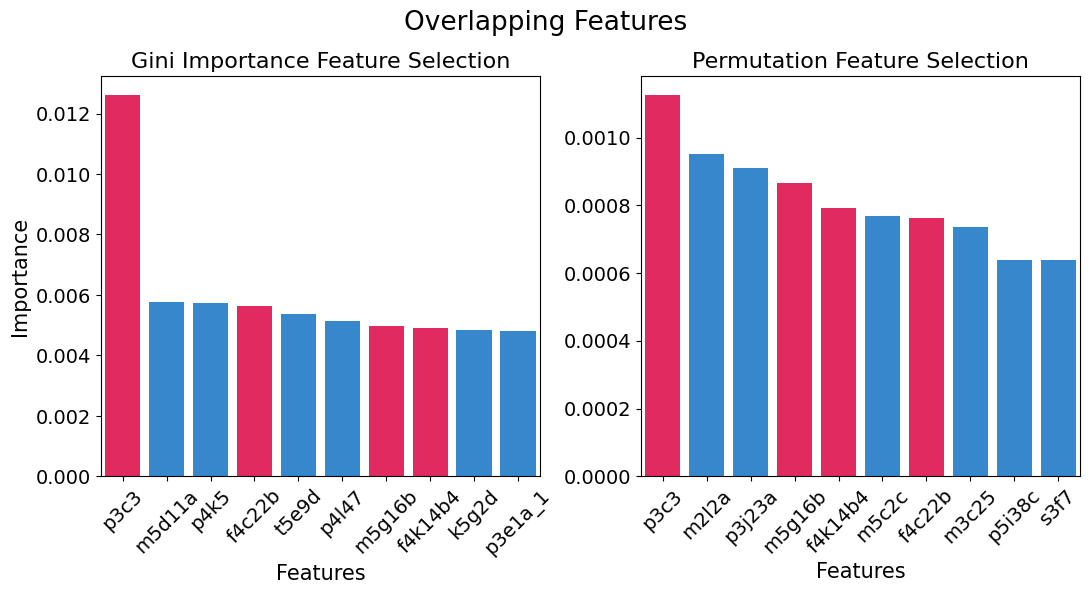

In [40]:
fig, axes = plt.subplots(1, 2, figsize= (11, 6))
fig.suptitle('Overlapping Features', fontsize = 19)


ax0 = sns.barplot(data = GX_ten_orig, x="Features", y="Importance", palette = GX_plot_orig_col, ax = axes[0])
ax0.set_ylabel("Importance", fontsize = 15)
ax0.set_xlabel("Features", fontsize = 15)
ax0.set_title("Gini Importance Feature Selection", fontsize = 16)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, fontsize = 14)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize = 14)


ax1 = sns.barplot(data = GX_ten, x="Features", y="Importance", palette = GX_plot_col, ax = axes[1])
ax1.set_ylabel("", fontsize = 15)
ax1.set_xlabel("Features", fontsize = 15)
ax1.set_title("Permutation Feature Selection", fontsize = 16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize = 14)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 14)

plt.tight_layout(pad = 1, w_pad = 0.5, h_pad = 0.8)
plt.show()

#fig.savefig('Fig2.png', bbox_inches='tight')

### Robustness Check 

Try combinations of other features. 

In [58]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])

Model4Cols =  ["p3c3", "f4c22b", "m5g16b", "f4k14b4", "grit"]

ModelFeatures = ['ch5wj10ae','k5g2d','k5g2f','ch4pvceil','ch5wj10raw',
                 'p5q1n','m5e2b','k5g2h','m2c38','p5j2e', "grit"]


ModelPermutation = ['ch5wj10ae','k5g2d','k5g2f','ch4pvceil','ch5wj10raw',
                 'p5q1n','m5e2b','k5g2h','m2c38','p5j2e', "grit"]

ModelAll = list(set(['ch5wj10ae','k5g2d','k5g2f','ch4pvceil','ch5wj10raw',
                 'p5q1n','m5e2b','k5g2h','m2c38','p5j2e', "grit", 
             'ch5wj10ae','k5g2d','k5g2f','ch4pvceil','ch5wj10raw',
                 'p5q1n','m5e2b','k5g2h','m2c38','p5j2e', "grit"]))

ModelTwo = ["ch5wj10ae", "p5q1n", "grit"]

model_name = [] 
model_MSE = []

In [59]:
model_name = [] 
model_MSE = []

In [60]:
## Model4Cols

data_Model4Cols = data_df_clean[Model4Cols]

train_df, val_df = train_test_split(data_Model4Cols, test_size = 0.4, random_state = 50)


X_train_df = train_df.iloc[:, 0:4]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:4]
y_val_df = val_df["grit"]


X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

GX_model1 = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model1.fit(X_val, y_val.ravel())

GX_model1_val = cross_validate(estimator = GX_model1, 
               X = X_val, y = y_val, 
               cv = 10,
               scoring=('neg_mean_squared_error'))

model_name.append(["Model4Cols"] * 10)

model_MSE.append(list(GX_model1_val["test_score"] * -1))

In [63]:
## ModelFeatures

data_ModelFeatures = data_df_clean[ModelFeatures]

train_df, val_df = train_test_split(data_ModelFeatures, test_size = 0.4, random_state = 50)


X_train_df = train_df.iloc[:, 0:10]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:10]
y_val_df = val_df["grit"]


X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

GX_model2 = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model2.fit(X_val, y_val.ravel())

GX_model2_val = cross_validate(estimator = GX_model2, 
               X = X_val, y = y_val, 
               cv = 10,
               scoring=('neg_mean_squared_error'))

model_name.append(["ModelFeatures"] * 10)

model_MSE.append(list(GX_model2_val["test_score"] * -1))

In [64]:
## ModelPermutation

ModelPermutation = data_df_clean[ModelPermutation]

train_df, val_df = train_test_split(ModelPermutation, test_size = 0.4, random_state = 50)


X_train_df = train_df.iloc[:, 0:10]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:10]
y_val_df = val_df["grit"]

X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

GX_model3 = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model3.fit(X_val, y_val.ravel())

GX_model3_val = cross_validate(estimator = GX_model3, 
               X = X_val, y = y_val, 
               cv = 10,
               scoring=('neg_mean_squared_error'))

model_name.append(["ModelPermutations"] * 10)

model_MSE.append(list(GX_model3_val["test_score"] * -1))

In [65]:
## ModelAll
ModelAll = data_df_clean[ModelAll]

train_df, val_df = train_test_split(ModelAll, test_size = 0.4, random_state = 50)


X_train_df = train_df.loc[:, train_df.columns != 'grit']
y_train_df = train_df["grit"]

X_val_df = val_df.loc[:, train_df.columns != 'grit']
y_val_df = val_df["grit"]

 
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

GX_model4 = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model4.fit(X_val, y_val.ravel())

GX_model4_val = cross_validate(estimator = GX_model4, 
               X = X_val, y = y_val, 
               cv = 10,
               scoring=('neg_mean_squared_error'))

model_name.append(["ModelAll"] * 10)

model_MSE.append(list(GX_model4_val["test_score"] * -1))

In [66]:
## Model2

data_ModelTwo = data_df_clean[ModelTwo]

train_df, val_df = train_test_split(data_ModelTwo, test_size = 0.4, random_state = 50)


X_train_df = train_df.iloc[:, 0:2]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:2]
y_val_df = val_df["grit"]

X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

GX_model5 = GradientBoostingRegressor(learning_rate = 0.01,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 5,
                                    n_estimators = 750)


GX_model5.fit(X_val, y_val.ravel())

GX_model5_val = cross_validate(estimator = GX_model5, 
               X = X_val, y = y_val, 
               cv = 10,
               scoring=('neg_mean_squared_error'))

model_name.append(["ModelTwo"] * 10)

model_MSE.append(list(GX_model5_val["test_score"] * -1))

<Axes: xlabel='Model', ylabel='MSE'>

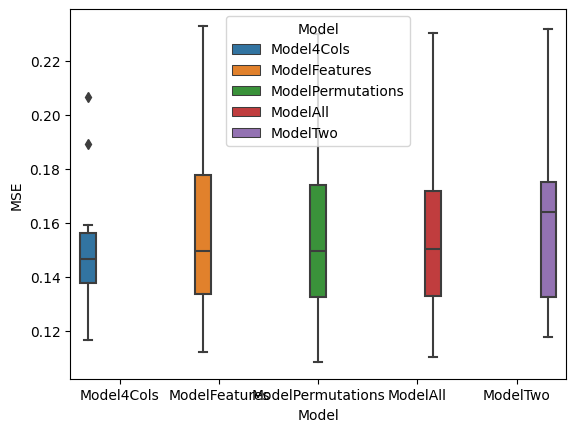

In [67]:
model_name = list(itertools.chain(*model_name))

model_MSE = list(itertools.chain(*model_MSE))

plot = pd.DataFrame({"Model" : model_name, 
                     "MSE" : model_MSE})

sns.boxplot(data=plot, y="MSE", x = "Model", hue = "Model")

In [68]:
plot.groupby(["Model"]).mean()

,MSE
Model,
Model4Cols,0.152385
ModelAll,0.155030
ModelFeatures,0.156050
ModelPermutations,0.154923
ModelTwo,0.162097


<Axes: >

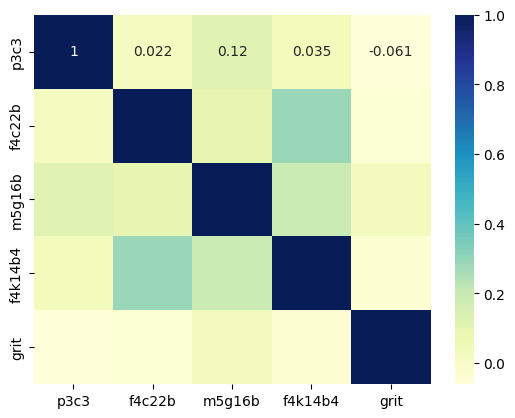

In [69]:
## Check to see if the top four features are correlated
sns.heatmap(data_df_clean[Model4Cols].corr(), cmap="YlGnBu", annot=True) 

### Hyperparameter Training

Using only the top 4 features.

In [74]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])

data_df_clean_subset =  data_df_clean[["p3c3", "f4c22b", "m5g16b", "f4k14b4", "grit"]]

train_df, val_df = train_test_split(data_df_clean_subset, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 0:4]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:4]
y_val_df = val_df["grit"]


X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


GX_model = GradientBoostingRegressor()

## Based on result from Random Forest 
GX_hyper = {"n_estimators" : [500, 750, 1000], 
           "max_features" : ["sqrt"], 
           "learning_rate" : [0.005, 0.01, 0.05],
           "min_samples_leaf": [5]}


GX_tune_results = GridSearchCV(estimator = GX_model, 
            param_grid = GX_hyper, 
            scoring = 'neg_mean_squared_error', 
            cv = 10, verbose = 2)

GX_tune_results.fit(X_val, y_val.ravel())

GX_tune_results_df = pd.DataFrame(GX_tune_results.cv_results_)

#GX_tune_results_df.to_csv("SmallFeatures_HyperResults_final.csv")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.5s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.3s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.005, max_features=sqrt, min_samples_leaf=5, n_estimators=500; tota

[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=750; total time=   0.5s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=750; total time=   0.4s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=750; total time=   0.4s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   0.6s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   0.5s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   0.7s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   1.0s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   0.8s
[CV] END learning_rate=0.05, max_features=sqrt, min_samples_leaf=5, n_estimators=1000; total time=   0.8s
[CV] END learning_rate=0.05, max_features=sqrt, m

In [75]:
GX_tune_results_df = pd.read_csv("SmallFeatures_HyperResults_final.csv")

test_names = ['split0_test_score','split1_test_score',
                          'split2_test_score','split3_test_score',
                          'split4_test_score',  'split5_test_score',
                        'split6_test_score',  'split7_test_score',
                        'split8_test_score',  'split9_test_score']

min_mse = GX_tune_results_df["mean_test_score"].max()

best_params = GX_tune_results_df[GX_tune_results_df["mean_test_score"] == min_mse]["params"]

best_params.values

array([{'learning_rate': 0.005, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 500}],
      dtype=object)

# Evaluate on Test Set

In [84]:
## Training Data
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])

data_df_clean_subset =  data_df_clean[["p3c3", "f4c22b", "m5g16b", "f4k14b4", "grit"]]

train_df, val_df = train_test_split(data_df_clean_subset, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 0:4]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:4]
y_val_df = val_df["grit"]

## Testing Data 
data_test_clean_ = pd.read_csv("Test_Full.csv").drop(columns=['Unnamed: 0'])

data_test_clean_subset =  data_df_clean[["p3c3", "f4c22b", "m5g16b", "f4k14b4", "grit"]]

X_test_df = data_test_clean_subset.iloc[:, 0:4]
y_test_df = data_test_clean_subset["grit"]


## To numpy 
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)

X_test = X_test_df
y_test = y_test_df

In [85]:
GX_model = GradientBoostingRegressor(learning_rate = 0.005, 
                                         max_features = 'sqrt', 
                                         min_samples_leaf = 5, 
                                         n_estimators = 500)
GX_model.fit(X_train, y_train.ravel())

y_predict_test = GX_model.predict(X_test)

C:\Users\schoo\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


### (Table 3) 

In [87]:
mean_squared_error(y_test, y_predict_test)

0.15287476178927753

# Interpretation 

In [42]:
data_df_clean = pd.read_csv("Training_Full.csv").drop(columns=['Unnamed: 0'])

data_df_clean_subset =  data_df_clean[["p3c3", "f4c22b", "m5g16b", "f4k14b4", "grit"]]

train_df, val_df = train_test_split(data_df_clean_subset, test_size = 0.4, random_state = 50)

X_train_df = train_df.iloc[:, 0:4]
y_train_df = train_df["grit"]

X_val_df = val_df.iloc[:, 0:4]
y_val_df = val_df["grit"]

X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

y_train = np.array(y_train_df)
y_val = np.array(y_val_df)


In [43]:
GX_model = GradientBoostingRegressor(learning_rate = 0.005,  
                                         max_features = 'sqrt', 
                                         min_samples_leaf = 5, 
                                         n_estimators = 500)

GX_model.fit(X_train, y_train.ravel())


GradientBoostingRegressor(learning_rate=0.005, max_features='sqrt',
                          min_samples_leaf=5, n_estimators=500)

Partial Dependence Plots

### (Figure 3) 

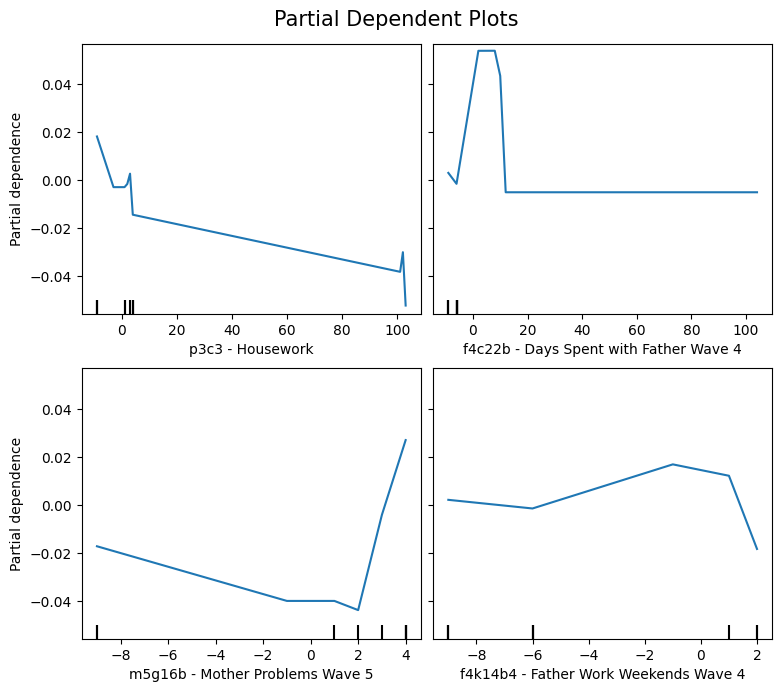

In [49]:
## Setting up the partial dependence plots

fig, axes = plt.subplots(2, 2, figsize= (8, 7))
fig.suptitle('Partial Dependent Plots', fontsize = 15)



feature_names = ["p3c3 - Housework", "f4c22b - Days Spent with Father Wave 4",
                 "m5g16b - Mother Problems Wave 5", "f4k14b4 - Father Work Weekends Wave 4"]


ax0 = PartialDependenceDisplay.from_estimator(GX_model, X_train,
                                                   features = [0,1,2,3], 
                                                   feature_names = feature_names,
                                                  ax = axes)


plt.tight_layout(pad = 1, w_pad = 0.5, h_pad = 0.8)
plt.show()

#fig.savefig('Fig3.png',  bbox_inches='tight')

Shapley Values

In [56]:
## Preparing the data for the force plot cases 

y_train_df_index = y_train_df.reset_index(drop = True)

## A case where a child has high grit
grit_max = y_train_df_index[y_train_df_index == y_train_df_index.max()].index[1]

## A case where a child has low grit 
grit_min = y_train_df_index[y_train_df_index == y_train_df_index.min()].index[0]

In [57]:
## Finding the shapley values

explainer = shap.TreeExplainer(GX_model)
shap_values = explainer.shap_values(X_train)

### (Figure 4) 

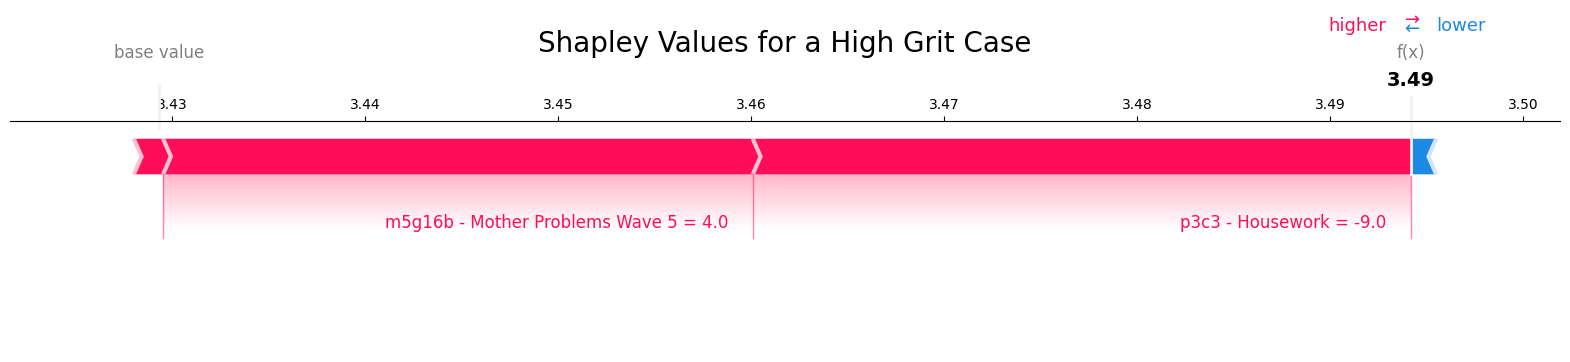

In [60]:
## Plotting the force plot for a high grit case
shap.initjs()

fig = shap.plots.force(explainer.expected_value, shap_values[grit_max], 
                X_train[grit_max], feature_names = feature_names,
                       matplotlib=True, plot_cmap = ["#3c3b6e", "#4682b4"],
                 show = False)
ax = plt.gcf()

plt.title('Shapley Values for a High Grit Case', fontsize = 20, pad = 50)

#ax.savefig('Fig4a.png',  bbox_inches='tight')

plt.show()

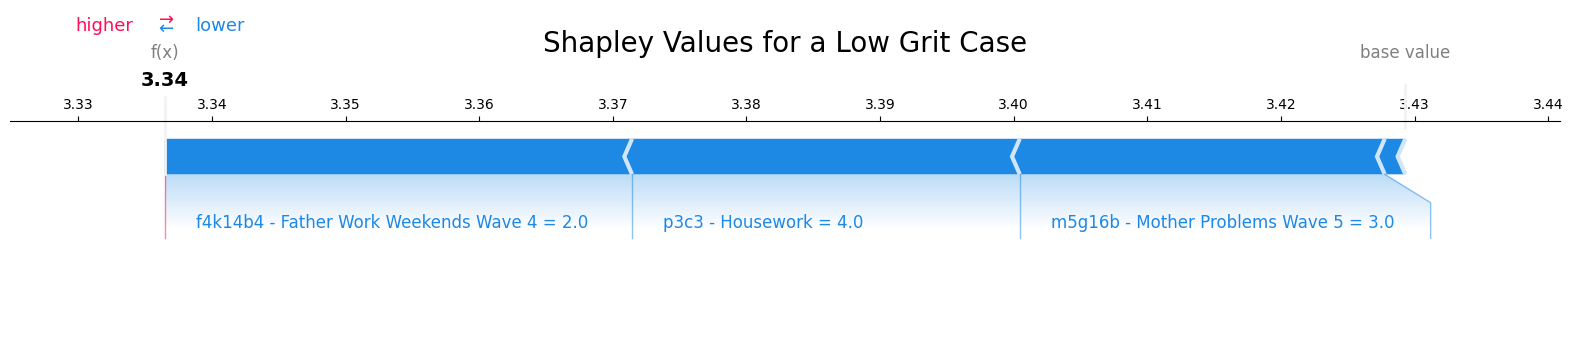

In [61]:
## Plotting the force plot for a low grit case

shap.initjs()

fig = shap.plots.force(explainer.expected_value, shap_values[grit_min], 
                X_train[grit_min], feature_names = feature_names,
                       matplotlib=True, plot_cmap = ["#3c3b6e", "#4682b4"],
                 show = False)
ax = plt.gcf()

plt.title('Shapley Values for a Low Grit Case', fontsize = 20, pad = 50)

#ax.savefig('Fig4b.png',  bbox_inches='tight')

plt.show()